# Previsão de Custos de Seguro Saúde


# Importando as libraries

In [276]:
import numpy as np
import pandas as pd
from collections import Counter
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Importando os dados


In [277]:
# Carregando o dataset

dataset = pd.read_csv('insurance.csv')

In [278]:
# Verificando o header

dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [279]:
#Analisando as dimensões do dataset

dataset.shape

(1338, 7)

The dataset consists of 7 columns and 1338 rows.

# Analisando os Dados

In [280]:
# Analisando os tipos de dados com o pandas

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [281]:
# Criando categorias para os objetos

dataset.sex = dataset.sex.astype('category')
dataset.smoker = dataset.smoker.astype('category')
dataset.region = dataset.region.astype('category')

In [282]:
# Verificando as categorias

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [283]:
# Analisando a descrição dos campos

dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [284]:
#contando a coluna sex

sex_count = dataset['sex'].value_counts(dropna = False)
sex_count

sex
male      676
female    662
Name: count, dtype: int64

In [285]:
set(dataset["sex"])
{'female', 'male'}

{'female', 'male'}

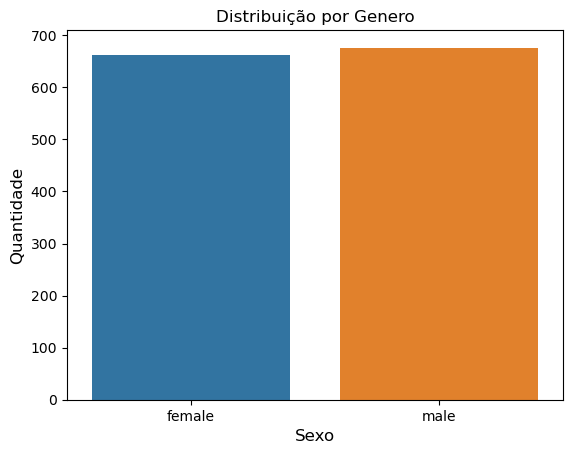

In [286]:
# Qual a relação entre quantidade de homens e mulheres na base de dados?
sns.barplot(x= sex_count.index,y= sex_count.values, data=dataset);
plt.title('Distribuição por Genero')
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Sexo', fontsize = 12)
plt.show()


Quantidade aproximada entre homens e mulhes

In [287]:
#Descobrindo o preço médio cobrado para cada sexo

mean_price_sex = dataset[['sex', 'charges']].groupby('sex', as_index = False).mean()
mean_price_sex

,sex,charges
0,female,12569.578844
1,male,13956.751178


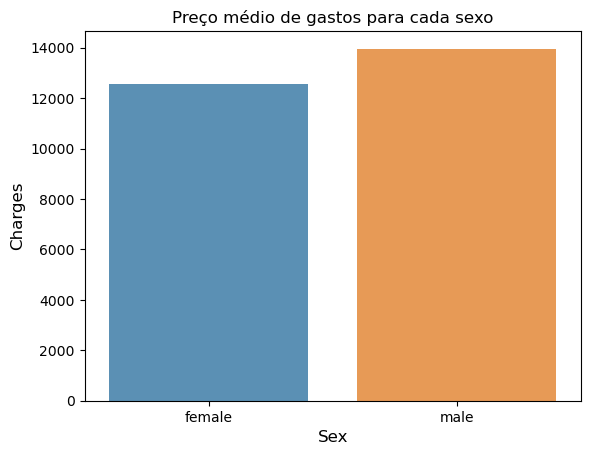

In [288]:
# preço médio de gastos para cada sexo
sns.barplot(x=mean_price_sex['sex'],y= mean_price_sex['charges'], alpha = 0.8)
plt.title('Preço médio de gastos para cada sexo')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

Observamos que o preço medio cobrado para os homens é maior

# Analisando a influência do tabagismo

In [289]:
#Agora vamos verificar os fumantes
smoker_count = dataset['smoker'].value_counts(dropna = False)
smoker_count

smoker
no     1064
yes     274
Name: count, dtype: int64

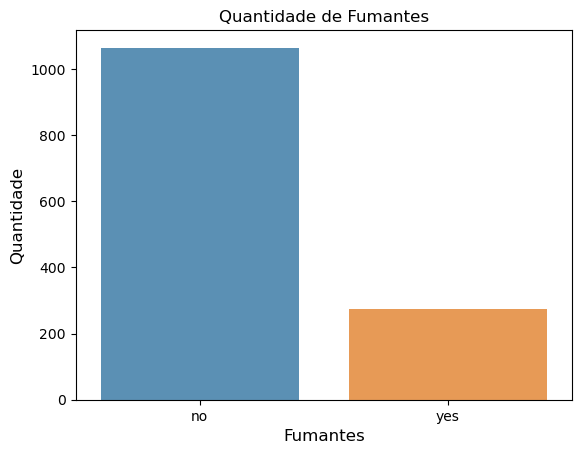

In [290]:
sns.barplot(x=smoker_count.index, y=smoker_count.values, alpha = 0.8)
plt.title('Quantidade de Fumantes')
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Fumantes', fontsize = 12)
plt.show()

Verificamos que a maioria é de não fumantes

In [291]:
#Vamos agora verificar os gastos entre fumantes e não fumantes
mean_price_smoker = dataset[['smoker', 'charges']].groupby('smoker', as_index = False).mean()
mean_price_smoker

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


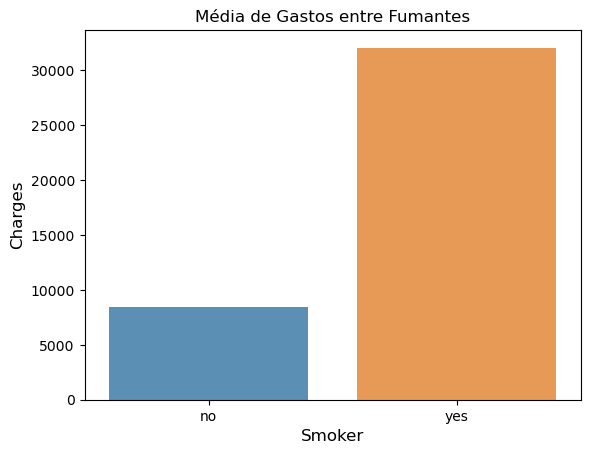

In [292]:
### media de gastos entre fumantes
sns.barplot(x=mean_price_smoker['smoker'], y=mean_price_smoker['charges'], alpha = 0.8)
plt.title('Média de Gastos entre Fumantes')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Smoker', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Média de Gastos por sexo e fumantes')

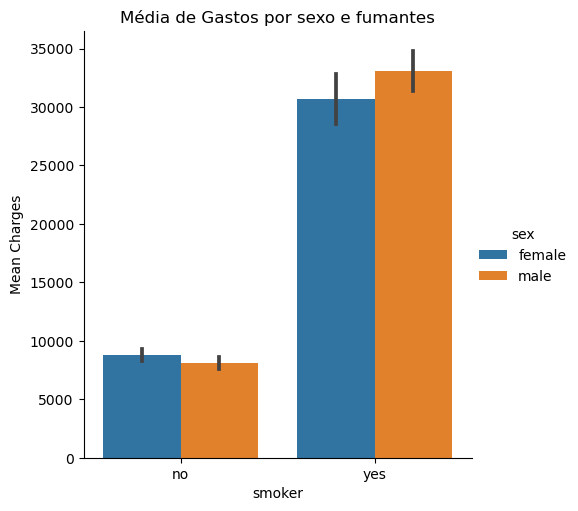

In [293]:
### Média de gastros por sexo e fumantes

sns.catplot(x = 'smoker', y = 'charges', hue = 'sex', data = dataset, kind = 'bar')
plt.ylabel('Mean Charges')
plt.title('Média de Gastos por sexo e fumantes')

Podemos observar que entre os fumantes os homens tem maior gasto e entre os não fumantes, as mulheres tem maior gasto.

##### Analisando as regiões

In [294]:
### Quantidade de pessoas por região

region_count = dataset['region'].value_counts(dropna = False)
region_count

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

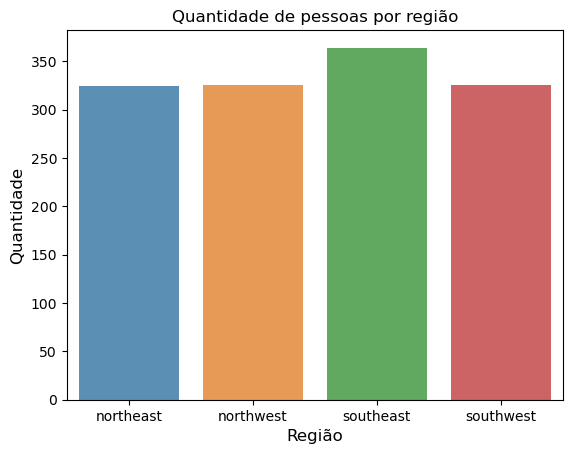

In [295]:

sns.barplot(x=region_count.index, y=region_count.values, alpha = 0.8)
plt.title('Quantidade de pessoas por região')
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Região', fontsize = 12)
plt.show()

#####  A maior amostragem é de pessoas da região Southeast 

In [296]:
### Média de gastos por região 

mean_price_region = dataset[['region', 'charges']].groupby('region', as_index = False).mean()
mean_price_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


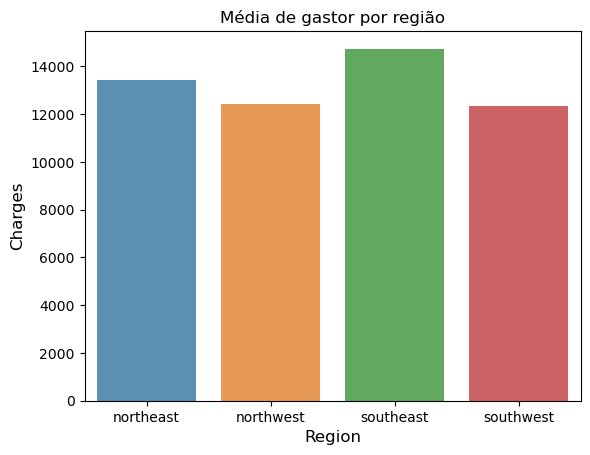

In [297]:
# Média de gastos por região
sns.barplot(x=mean_price_region['region'], y=mean_price_region['charges'], alpha = 0.8)
plt.title('Média de gastor por região')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Distribuição por sexo')

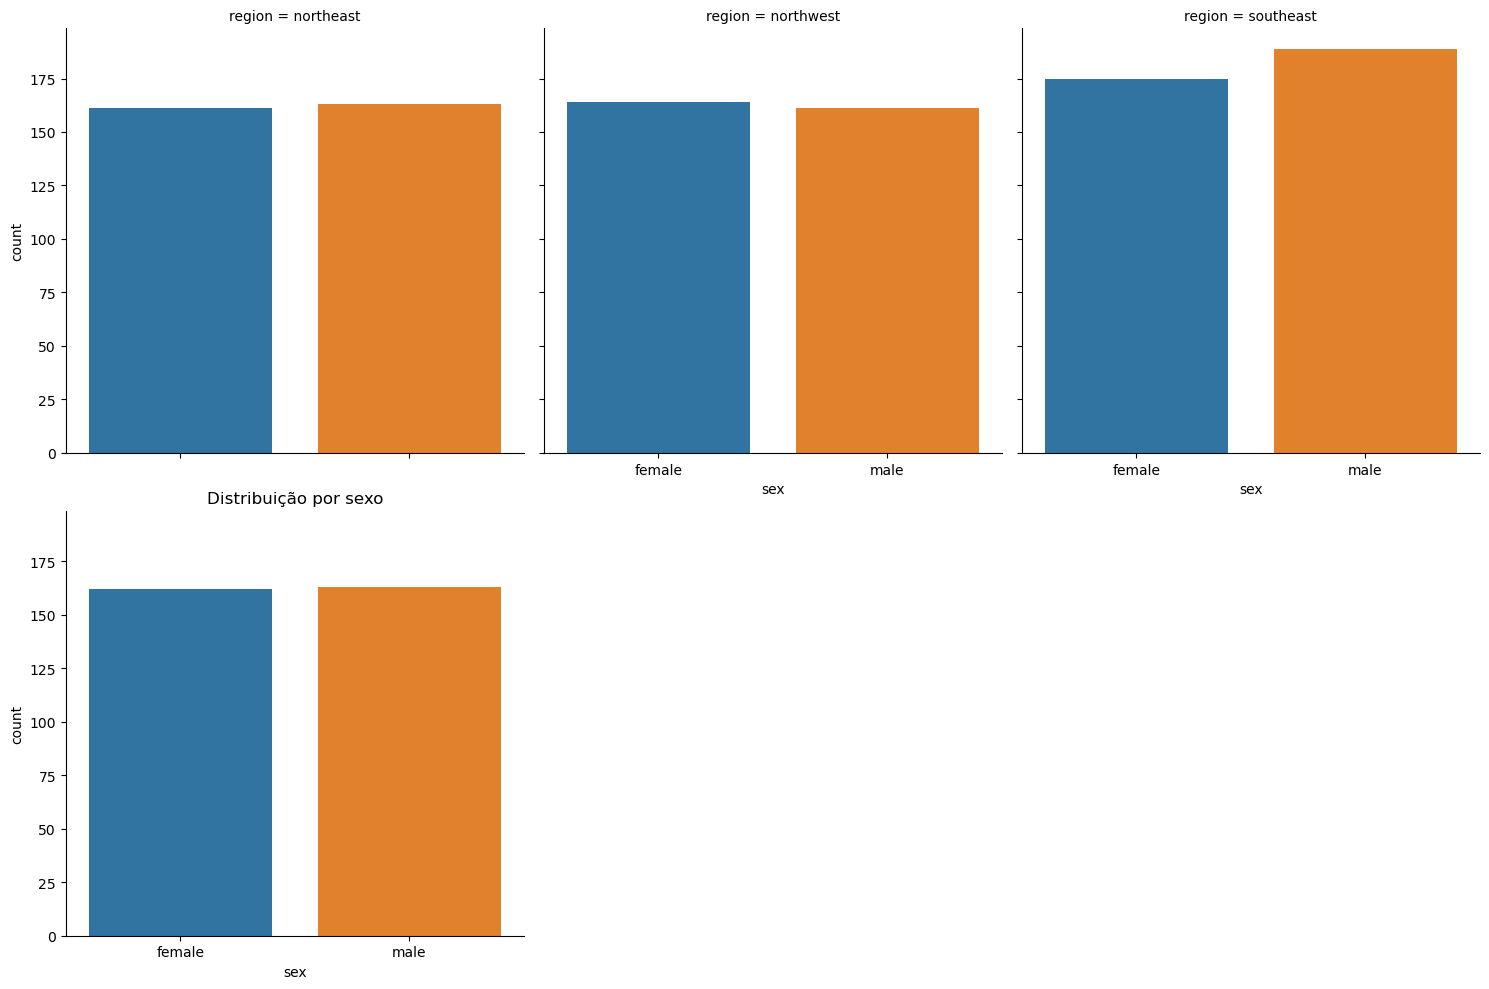

In [298]:
#Distribuição por sexo em cada região
sns.catplot(x='sex', col = 'region', data = dataset, kind = 'count', col_wrap = 3)
plt.title('Distribuição por sexo')

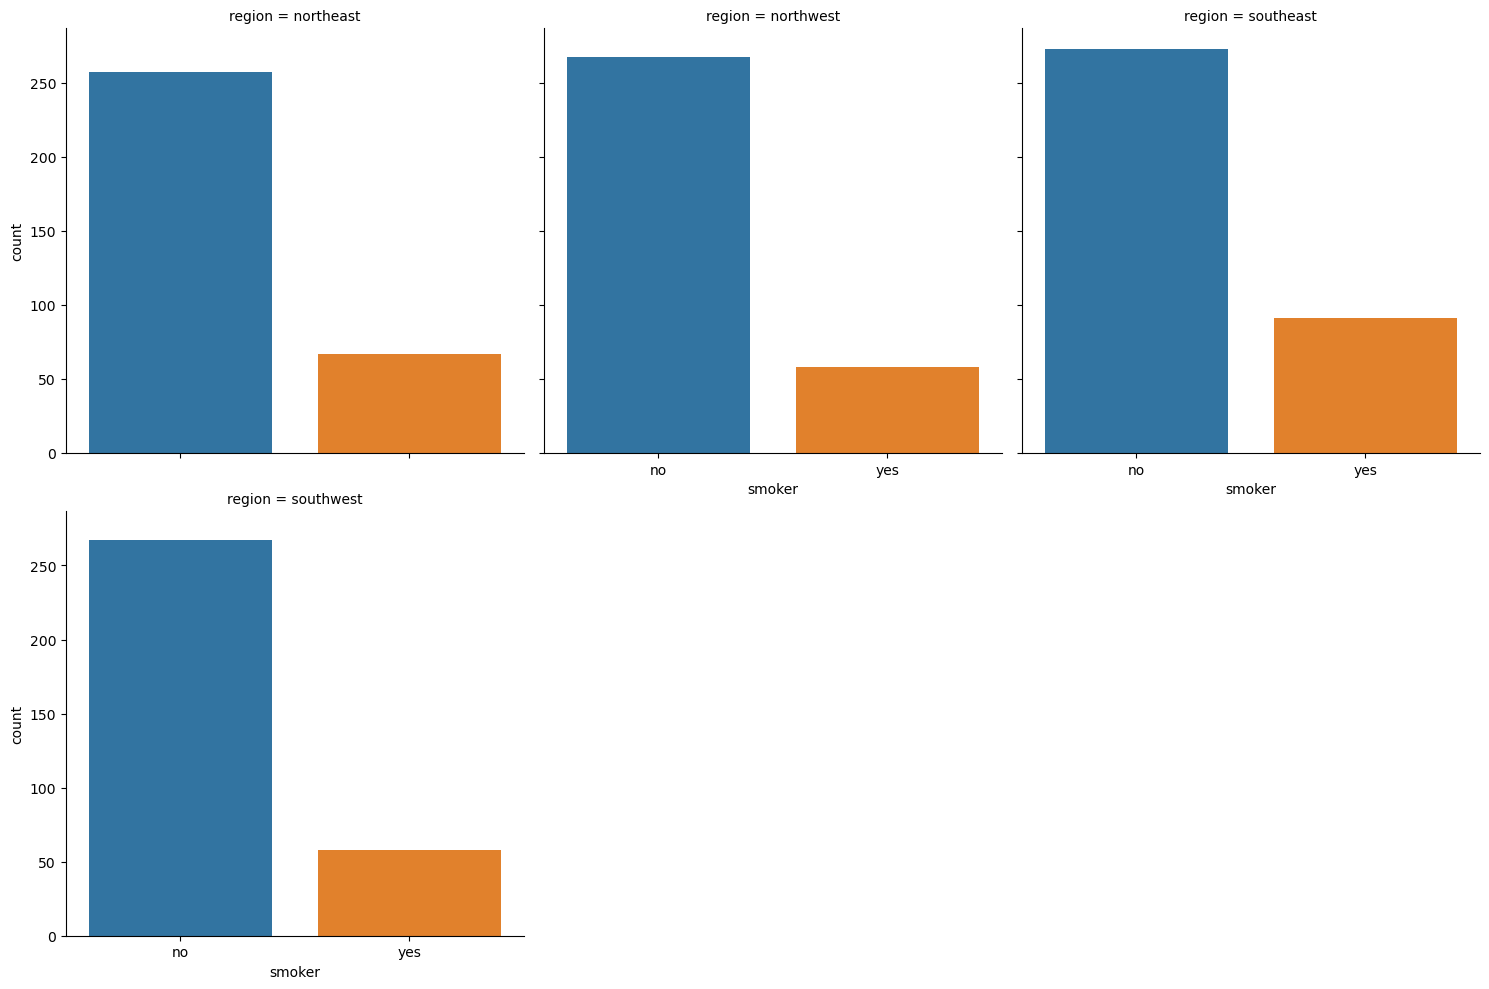

In [299]:
## Distribuição de fumantes por região

sns.catplot(x='smoker', col = 'region', data = dataset, kind = 'count', col_wrap = 3)

Vemos pelo gráfico que a região com mais fumantes é a Southeast.

##### Analisando a idade

Text(0.5, 1.0, 'Distribuição por idade')

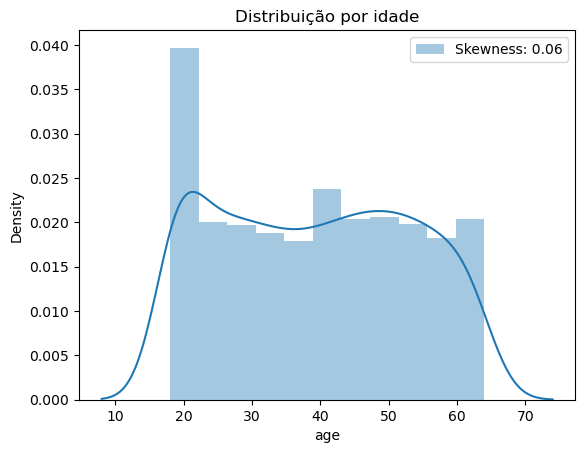

In [300]:
#Analisando a distribuição por idade

sns.distplot(dataset['age'], label = 'Skewness: %.2f'%(dataset['age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribuição por idade')

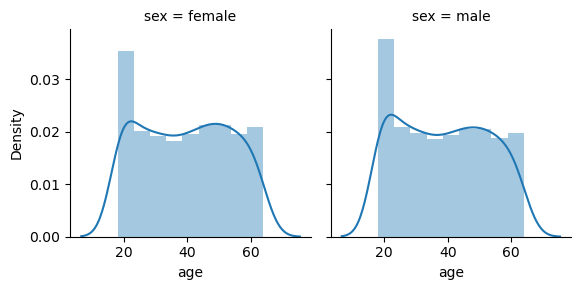

In [301]:
# Distribuição por idade e sexo
grid = sns.FacetGrid(dataset, col = 'sex')
grid.map(sns.distplot, 'age')

Observamos que a distribuição é parecida.


Text(0.5, 1.0, 'Distribuição de idade por sexo')

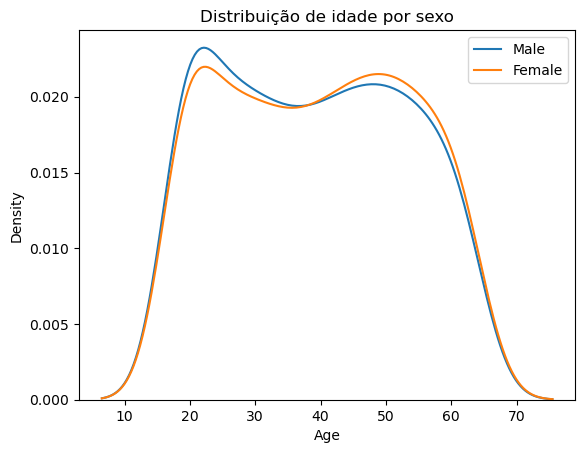

In [302]:
#sobreposição entre os graficos
sns.kdeplot(dataset['age'][dataset['sex'] == 'male'], label = 'Male')
sns.kdeplot(dataset['age'][dataset['sex'] == 'female'], label = 'Female')
plt.xlabel('Age')
plt.legend()
plt.title('Distribuição de idade por sexo')

Observamos que próximo aos 20 anos, temos mais homens e mais mulheres a partir dos 40 anos. 

Text(0.5, 1.0, 'Distribuição por IMC')

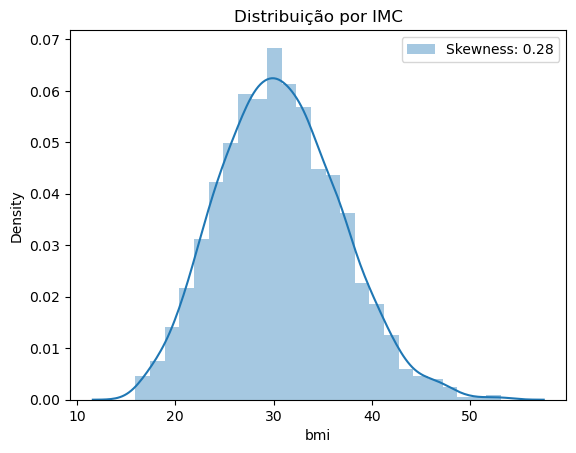

In [303]:
#Distribuição por IMC
sns.distplot(dataset['bmi'], label = 'Skewness: %.2f'%(dataset['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('Distribuição por IMC')

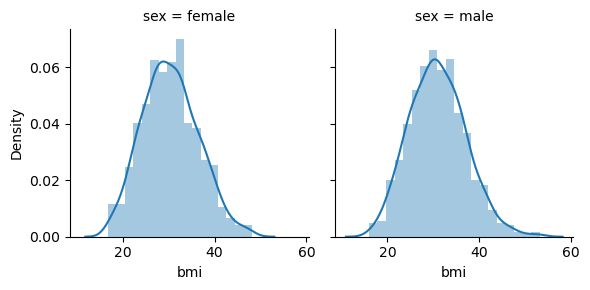

In [304]:
# IMC por sexo
grid = sns.FacetGrid(dataset, col = 'sex')
grid.map(sns.distplot, 'bmi')

From the above graph, we can see that both the graphs look similar, except in the case of male where the graph has a slight tail to the right.

Text(0.5, 1.0, 'IMC por sexo')

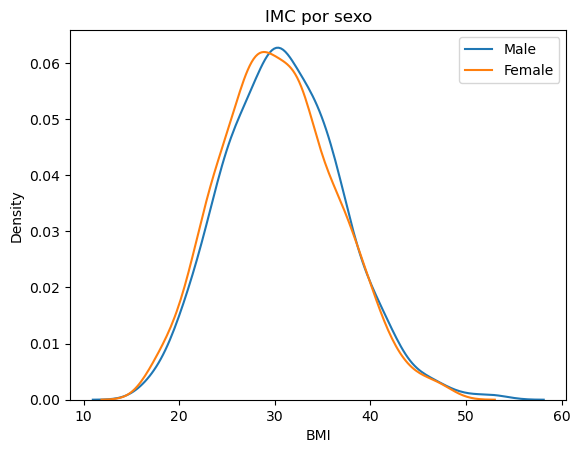

In [305]:
#Analisando IMC por sexo
sns.kdeplot(dataset['bmi'][dataset['sex'] == 'male'], label = 'Male')
sns.kdeplot(dataset['bmi'][dataset['sex'] == 'female'], label = 'Female')
plt.xlabel('BMI')
plt.legend()
plt.title('IMC por sexo')

<Axes: >

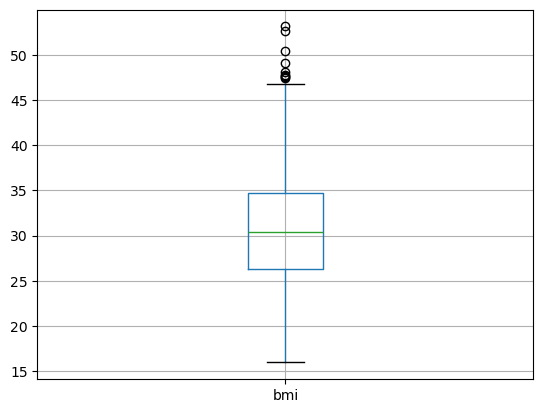

In [306]:
dataset.boxplot(column = ['bmi'])

##### Analisando distribuição por número de filhos 

Text(0.5, 1.0, 'Distribuição por número de filhos')

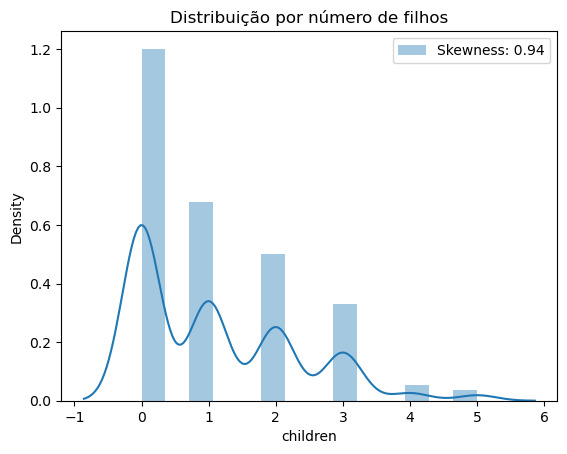

In [307]:
#Analisando distribuição por número de filhos 

sns.distplot(dataset['children'], label = 'Skewness: %.2f'%(dataset['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribuição por número de filhos')

O dado está muito assimetrico e será removido

<Axes: >

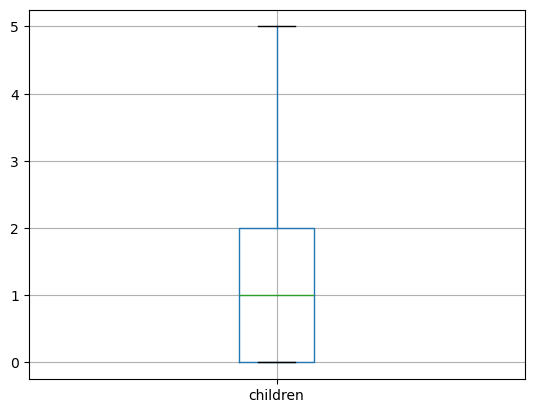

In [308]:
dataset.boxplot(column = ['children'])

#### Retirando coluna região

In [309]:
#Retirando coluna região

modified_dataset = dataset.copy()
modified_dataset.drop(['region'], axis = 1, inplace = True)
modified_dataset.drop(['children'], axis = 1, inplace = True)

In [310]:

modified_dataset

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


####  Transformando os dados


#####  Normalizando as colunas numericas


In [311]:
def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['age', 'bmi']

for each_column in numerical_columns:
    normalize_columns(modified_dataset, each_column)

In [312]:
modified_dataset

,age,sex,bmi,smoker,charges
0,0.021739,female,0.321227,yes,16884.92400
1,0.000000,male,0.479150,no,1725.55230
2,0.217391,male,0.458434,no,4449.46200
3,0.326087,male,0.181464,no,21984.47061
4,0.304348,male,0.347592,no,3866.85520
...,...,...,...,...,...
1333,0.695652,male,0.403820,no,10600.54830
1334,0.000000,female,0.429379,no,2205.98080
1335,0.000000,female,0.562012,no,1629.83350
1336,0.065217,female,0.264730,no,2007.94500


In [313]:
# One Hot Encoding para as colunas - sex, smoker of the dataset

encoded_dataset = pd.get_dummies(data = modified_dataset, columns = ['sex', 'smoker'])
encoded_dataset

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,16884.92400,True,False,False,True
1,0.000000,0.479150,1725.55230,False,True,True,False
2,0.217391,0.458434,4449.46200,False,True,True,False
3,0.326087,0.181464,21984.47061,False,True,True,False
4,0.304348,0.347592,3866.85520,False,True,True,False
...,...,...,...,...,...,...,...
1333,0.695652,0.403820,10600.54830,False,True,True,False
1334,0.000000,0.429379,2205.98080,True,False,True,False
1335,0.000000,0.562012,1629.83350,True,False,True,False
1336,0.065217,0.264730,2007.94500,True,False,True,False


In [314]:
### Criando a coluna target a partir de charges

target_data = encoded_dataset['charges']
encoded_dataset['Target'] = target_data

encoded_dataset.drop(['charges'], axis = 1, inplace = True)
encoded_dataset

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes,Target
0,0.021739,0.321227,True,False,False,True,16884.92400
1,0.000000,0.479150,False,True,True,False,1725.55230
2,0.217391,0.458434,False,True,True,False,4449.46200
3,0.326087,0.181464,False,True,True,False,21984.47061
4,0.304348,0.347592,False,True,True,False,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,0.403820,False,True,True,False,10600.54830
1334,0.000000,0.429379,True,False,True,False,2205.98080
1335,0.000000,0.562012,True,False,True,False,1629.83350
1336,0.065217,0.264730,True,False,True,False,2007.94500


Selecionando as colunas numericas

In [315]:
### Creating a filter_dataset
#
#filter_dataset = encoded_dataset[['age', 'bmi']]
#filter_dataset

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


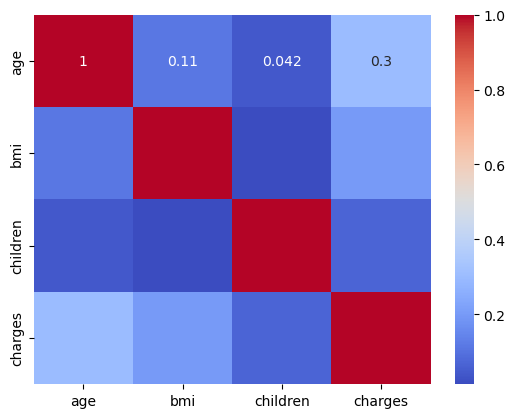

In [316]:
# Get numerical columns correlation
corr_matrix = dataset.corr(numeric_only=int)
print(corr_matrix)

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Separando treino e teste

In [318]:
### Splitting 
X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [319]:
### Dados de X

X

array([[0.021739130434782608, 0.3212267958030669, True, False, False,
        True],
       [0.0, 0.479149852031208, False, True, True, False],
       [0.21739130434782608, 0.4584342211460855, False, True, True,
        False],
       ...,
       [0.0, 0.5620123755716976, True, False, True, False],
       [0.06521739130434782, 0.26472962066182404, True, False, True,
        False],
       [0.9347826086956522, 0.35270379338175945, True, False, False,
        True]], dtype=object)

In [320]:
### Dados de Y

Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [321]:
#Separando dataset em 80% treino e 20% teste

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) #, shuffle = True)

#### Aplicando Regressões 

#### Executando Modelos 

In [322]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)

def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [323]:
def avalia_modelo(tipo_modelo):
    mse = round(mean_squared_error(Y_test, Y_pred), 3)
    rmse = round(sqrt(mse), 3)
    mae = round(mean_absolute_error(Y_test, Y_pred))
    mape_result = round(calculate_mape(Y_test, Y_pred))
    r2_value = round(r2_score(Y_test, Y_pred), 3)

    model_rmse[tipo_modelo] = rmse
    model_r2[tipo_modelo] = r2_value
    model_mape[tipo_modelo] = mape_result

    print('RMSE      : {}'.format(rmse))
    print('R-squared : {}'.format(r2_value))
    print('MAE       : {}'.format(mae))
    print('MAPE      : {}'.format(mape_result))

In [324]:
# Dicionário para RMSE

model_rmse = OrderedDict()

In [325]:
# Dicionário para r-squared

model_r2 = OrderedDict()

Aplicando Multi Linear Regression

In [326]:
# Dicionário para MAPE
model_mape = OrderedDict()

In [327]:
### Treinamento

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [328]:
Y_pred = linear_regressor.predict(X_test)

In [329]:
# Avaliando o desempenho do modelo

avalia_modelo('Multi Linear Regression')


RMSE      : 5978.251
R-squared : 0.77
MAE       : 4361
MAPE      : 54


##### Aplicando Lasso Regression

In [330]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [331]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 20}
-38068739.378212765


In [332]:
Y_pred = lasso_regressor.predict(X_test)

In [333]:
#Processa avaliação do modelo
avalia_modelo('Lasso Regression')

RMSE      : 5876.889
R-squared : 0.778
MAE       : 4234
MAPE      : 49


##### Aplicando Ridge Regression

In [334]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [335]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-38090935.8884193


In [336]:
Y_pred = ridge_regressor.predict(X_test)

In [337]:
#Processa avaliação do modelo
avalia_modelo('Ridge Regression')

RMSE      : 5875.827
R-squared : 0.778
MAE       : 4246
MAPE      : 49


##### Aplicando Support Vector Regression

In [338]:
### Treinando Support Vector Regression

support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(X_train, Y_train)

SVR()

In [339]:
Y_pred = support_vector_regressor.predict(X_test)

In [340]:
#Processa avaliação do modelo
avalia_modelo('Support Vector Regression')


RMSE      : 12842.066
R-squared : -0.062
MAE       : 8580
MAPE      : 113


Aplicando Decision Tree Regression

In [341]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [342]:
Y_pred = decision_tree_regressor.predict(X_test)

In [343]:
#Processa avaliação do modelo
avalia_modelo('Decision Tree Regression')

RMSE      : 6587.611
R-squared : 0.72
MAE       : 3190
MAPE      : 47


Aplicando Random Forest Regression com 10 árvores

In [344]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [345]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [346]:
#Processa avaliação do modelo
avalia_modelo('Random Forest Regression 10')

RMSE      : 4881.349
R-squared : 0.847
MAE       : 2680
MAPE      : 35


Aplicando Random Forest Regression com 50 árvores

In [347]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [348]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [349]:
#Processa avaliação do modelo
avalia_modelo('Random Forest Regression 50')

RMSE      : 4867.233
R-squared : 0.847
MAE       : 2636
MAPE      : 37


Aplicando Random Forest Regression com 100 árvores

In [350]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [351]:
Y_pred = random_forest_regressor.predict(X_test)

In [352]:
#Processa avaliação do modelo
avalia_modelo('Random Forest Regression 100)')

RMSE      : 4853.807
R-squared : 0.848
MAE       : 2632
MAPE      : 35


Aplicando Random Forest Regression com 1000 árvores

In [353]:
#Treinando modelo
random_forest_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=27)

In [354]:
Y_pred = random_forest_regressor.predict(X_test)

In [355]:
#Processa avaliação do modelo
avalia_modelo('Random Forest Regression 1000')

RMSE      : 4850.268
R-squared : 0.848
MAE       : 2649
MAPE      : 36


Aplicando Stacking Regression

In [356]:
### Preparando Stacking Regressor

base_models = list()

base_models.append(('decision_tree', decision_tree_regressor))
base_models.append(('linear_regression', linear_regressor))

meta_model = random_forest_regressor

In [357]:
### Treinando Stacking Regression model 

stacking_regressor = StackingRegressor(estimators = base_models, final_estimator = meta_model)
stacking_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('decision_tree', DecisionTreeRegressor()),
                              ('linear_regression', LinearRegression())],
                  final_estimator=RandomForestRegressor(n_estimators=1000,
                                                        random_state=27))

In [358]:
### Prevendo resultados

Y_pred = stacking_regressor.predict(X_test)

In [359]:
#Processa avaliação do modelo
avalia_modelo('Stacking Regression')

RMSE      : 5191.661
R-squared : 0.826
MAE       : 3142
MAPE      : 50


Avaliação dos Modelos

RMSE, R-squared e MAPE dos modelos

In [360]:
#Dicionario RMSE
model_rmse

OrderedDict([('Multi Linear Regression', 5978.251),
             ('Lasso Regression', 5876.889),
             ('Ridge Regression', 5875.827),
             ('Support Vector Regression', 12842.066),
             ('Decision Tree Regression', 6587.611),
             ('Random Forest Regression 10', 4881.349),
             ('Random Forest Regression 50', 4867.233),
             ('Random Forest Regression 100)', 4853.807),
             ('Random Forest Regression 1000', 4850.268),
             ('Stacking Regression', 5191.661)])

In [361]:
#Dicionario r-squared 

model_r2

OrderedDict([('Multi Linear Regression', 0.77),
             ('Lasso Regression', 0.778),
             ('Ridge Regression', 0.778),
             ('Support Vector Regression', -0.062),
             ('Decision Tree Regression', 0.72),
             ('Random Forest Regression 10', 0.847),
             ('Random Forest Regression 50', 0.847),
             ('Random Forest Regression 100)', 0.848),
             ('Random Forest Regression 1000', 0.848),
             ('Stacking Regression', 0.826)])

In [362]:
#Dicionario MAPE
model_mape

OrderedDict([('Multi Linear Regression', 54),
             ('Lasso Regression', 49),
             ('Ridge Regression', 49),
             ('Support Vector Regression', 113),
             ('Decision Tree Regression', 47),
             ('Random Forest Regression 10', 35),
             ('Random Forest Regression 50', 37),
             ('Random Forest Regression 100)', 35),
             ('Random Forest Regression 1000', 36),
             ('Stacking Regression', 50)])

In [364]:
### Tabulando os resultados

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared', 'MAPE'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model],model_mape[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════════╤═══════════════════════════╤═════════════╤════════╕
│   S.No. │ Classification Model          │   Root Mean Squared Error │   R-squared │   MAPE │
╞═════════╪═══════════════════════════════╪═══════════════════════════╪═════════════╪════════╡
│       1 │ Multi Linear Regression       │                   5978.25 │       0.77  │     54 │
├─────────┼───────────────────────────────┼───────────────────────────┼─────────────┼────────┤
│       2 │ Lasso Regression              │                   5876.89 │       0.778 │     49 │
├─────────┼───────────────────────────────┼───────────────────────────┼─────────────┼────────┤
│       3 │ Ridge Regression              │                   5875.83 │       0.778 │     49 │
├─────────┼───────────────────────────────┼───────────────────────────┼─────────────┼────────┤
│       4 │ Support Vector Regression     │                  12842.1  │      -0.062 │    113 │
├─────────┼───────────────────────────────┼───────